In [60]:
import pandas as pd
from google.colab import drive

from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
drive.mount('/content/gdrive')
path = 'gdrive/MyDrive/sentiment/'

Mounted at /content/gdrive


In [3]:
df = pd.read_csv(path + 'sentiment_analysis_1500_for_labeling_manual.csv')

In [5]:
df

,Unnamed: 0.1,Unnamed: 0,comment_text,clean_text,llama3_output,manual labeling
0,5211,5473,@Vi11atoro @PNCSV Excelente señor villatoro! N...,Excelente señor villatoro! No dejen que vuelva...,-1,-1
1,8850,9112,@fulloa51 @ChrisGuevaraG Alguien que se pueda ...,Alguien que se pueda a los pastores que salen ...,-1,-1
2,6909,7171,@MarceloLarin1 En esta Vuelta como que te ilum...,En esta Vuelta como que te iluminaron mas los ...,-1,-1
3,1822,2037,@MarceloLarin1 No tenés dignidad porque allí s...,No tenés dignidad porque allí seguís tirando k...,-1,-1
4,30,30,@nayibbukele El pueblo salvadoreño necesita qu...,El pueblo salvadoreño necesita que se combata ...,-1,1
...,...,...,...,...,...,...
1495,8328,8590,"@FranAlabi Dios les siga dando a los médicos,s...","Dios les siga dando a los médicos,sabiduría, c...",1,1
1496,5504,5766,@Vi11atoro @umana_lima @PNCSV Porque ud. lo pi...,"Porque ud. lo pidio, al cliente lo que pida. F...",1,1
1497,8150,8412,@FranAlabi @nayibbukele @grupo_samu No hay pal...,No hay palabras para agradecerles infinitament...,1,1
1498,8096,8358,@FranAlabi @grupo_samu Dios los bendiga son un...,Dios los bendiga son un amor,1,1


In [ ]:
df.llama3_output

In [19]:
cm = confusion_matrix(df.llama3_output, df['manual labeling'])

In [20]:
df[(df.llama3_output == -1) & (df['manual labeling'] == 0)].shape

(36, 6)

In [25]:
def confusion_matrix_visualization(cf_matrix):
    # Adjusted for 3 classes
    group_names = ['Negative', 'Neg - Neu', 'Neg - Pos', 'Neu - Neg', 'Neutral', 'Neu - Pos', 'Pos - Neg', 'Pos - Neu', 'Positive']

    group_counts = [f'{value:.0f}' for value in cf_matrix.flatten()]
    group_percentages = [f'{value:.2%}' for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    # Ensuring the group names and counts match the matrix shape
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(3, 3)

    fig, ax = plt.subplots(figsize=(9, 7))
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
    ax.set_xlabel('Manual labels')
    ax.set_ylabel('llama3 labels')
    ax.set_title('Confusion Matrix')
    fig.show()

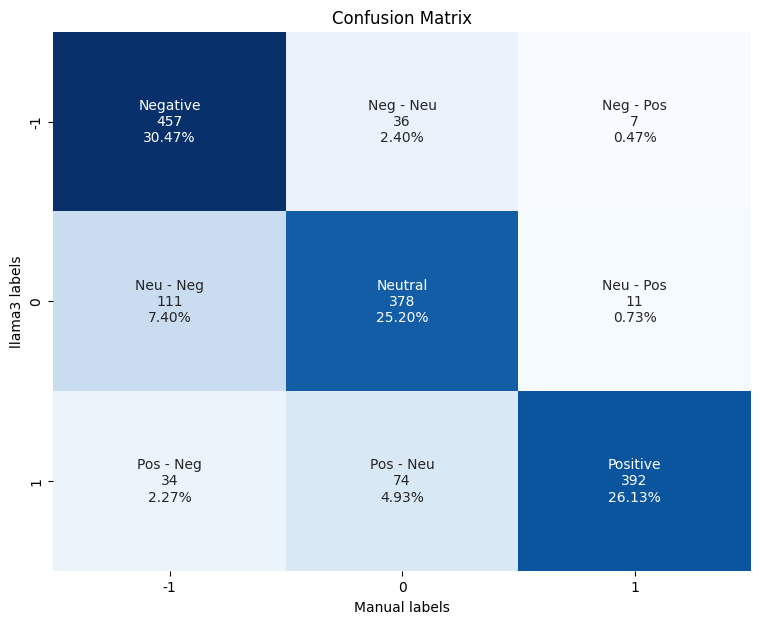

In [26]:
confusion_matrix_visualization(cm)

In [27]:
def calculate_accuracy(true_labels, predictions):
    correct_predictions = sum(1 for true, pred in zip(true_labels, predictions) if true == pred)
    total_predictions = len(true_labels)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [28]:
calculate_accuracy(df.llama3_output, df['manual labeling'])

0.818

In [29]:
df_all = pd.read_csv(path + 'sentiment_llama_df_complete - sentiment_llama_df_complete.csv')

# Check indices before merge

In [47]:
df[df.comment_text.str.contains('@FranAlabi @grupo_samu Dios los bendiga son')]

,Unnamed: 0.1,Unnamed: 0,comment_text,clean_text,llama3_output,manual labeling
1498,8096,8358,@FranAlabi @grupo_samu Dios los bendiga son un...,Dios los bendiga son un amor,1,1


In [48]:
df_all[df_all.comment_text.str.contains('@FranAlabi @grupo_samu Dios los bendiga son')]

,Unnamed: 0,comment_url,comment_createdAt,comment_id,comment_viewCount,comment_lang,comment_author_createdAt,comment_location,comment_text,isComment_self__decalred__location__El_Salvador,...,post_name,post_description,post_followers,post_verified,post_text,isActor_self__decalred__location__El_Salvador,post_processed_text,actor_affiliation,llama3_output,llama3_reason
8096,8358,https://x.com/Lauraleonorrub1/status/130019382...,1.598825e+09,1.300190e+18,NaN,es,11/05/2020,NaN,@FranAlabi @grupo_samu Dios los bendiga son un...,False,...,Francisco Alabi 🇸🇻,Ministro de Salud 🇸🇻 Médico Cirujano Laparosco...,410700.0,True,"""Nos abrazaste, no pudiste, pero nos abrazaste...",True,nos abrazaste no pudiste pero nos abrazaste he...,Government,1.0,The tweet expresses a positive sentiment by us...


In [70]:
df_merge = pd.merge(df_all, df[['Unnamed: 0', 'manual labeling']], left_on = 'Unnamed: 0', right_on = 'Unnamed: 0')

In [71]:
df_merge['manual labeling'].value_counts()/1500*100

manual labeling
-1    40.133333
 0    32.533333
 1    27.333333
Name: count, dtype: float64

In [72]:
train_df, test_df = train_test_split(df_merge, test_size=500, stratify=df_merge['manual labeling'], random_state=10)

In [73]:
train_df['manual labeling'].value_counts()/len(train_df)*100

manual labeling
-1    40.2
 0    32.5
 1    27.3
Name: count, dtype: float64

In [74]:
test_df['manual labeling'].value_counts()/len(test_df)*100

manual labeling
-1    40.0
 0    32.6
 1    27.4
Name: count, dtype: float64

In [76]:
train_df.to_csv(path + 'train_df_1000_manual.csv')
test_df.to_csv(path + 'test_df_500_manual.csv')
df_merge.to_csv(path + 'df_all_1500_manual.csv')